In [1]:
import time
import numpy as np
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pylab
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso,LassoCV, Ridge,RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Part 0: Data loading

In [2]:
#read the csv
df = pd.read_csv("ccdefault.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print('# of Rows:', len(df))
print('# of Columns:',len(df.columns))
summary = df.describe()
print(summary)

# of Rows: 30000
# of Columns: 25
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   

We can see that there are 30000 instances and 25 columns. 

For Part 1 and Part 2, we use the ccdefault dataset, with 90% for training and 10% for test (stratified sampling) and 10 fold cross validation for the random forest model.

# Part 1: Random forest estimators

In [4]:
X = df.iloc[:, 1:24].values
y = df['DEFAULT'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
estimators = [1, 5, 10, 20, 50,75, 100, 150]
CV_train = []
CV_test = []

for i in estimators:

    start_time = time.process_time()
    
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_train_std, y_train)
    scores_CV_train = cross_val_score(forest, X_train_std, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    scores_CV_test = cross_val_score(forest, X_test_std, y_test, cv=10, scoring='accuracy', n_jobs=-1)

    end_time = time.process_time()

    # Calculate the mean
    mean_CV_train = scores_CV_train.mean()
    CV_train.append(mean_CV_train)
    mean_CV_test = scores_CV_test.mean()
    CV_test.append(mean_CV_test)

    print('N_estimators: ', i)
    print('In sample accuracy: ', mean_CV_train)
    print('Out of sample accuracy: ', mean_CV_test)
    print('Computation time: ', end_time-start_time, 's')
    print("")

N_estimators:  1
In sample accuracy:  0.7292592592592593
Out of sample accuracy:  0.7166666666666667
Computation time:  0.1875 s

N_estimators:  5
In sample accuracy:  0.7868148148148147
Out of sample accuracy:  0.781
Computation time:  0.40625 s

N_estimators:  10
In sample accuracy:  0.8051111111111112
Out of sample accuracy:  0.8093333333333333
Computation time:  0.703125 s

N_estimators:  20
In sample accuracy:  0.812037037037037
Out of sample accuracy:  0.8073333333333332
Computation time:  1.328125 s

N_estimators:  50
In sample accuracy:  0.8142592592592592
Out of sample accuracy:  0.8113333333333334
Computation time:  3.234375 s

N_estimators:  75
In sample accuracy:  0.8156666666666668
Out of sample accuracy:  0.8119999999999999
Computation time:  5.328125 s

N_estimators:  100
In sample accuracy:  0.8165555555555555
Out of sample accuracy:  0.8116666666666668
Computation time:  7.75 s

N_estimators:  150
In sample accuracy:  0.8157037037037037
Out of sample accuracy:  0.812
C

In [7]:
print("")
print("CV_train:", CV_train)
print("CV_test:",CV_test)


CV_train: [0.7292592592592593, 0.7868148148148147, 0.8051111111111112, 0.812037037037037, 0.8142592592592592, 0.8156666666666668, 0.8165555555555555, 0.8157037037037037]
CV_test: [0.7166666666666667, 0.781, 0.8093333333333333, 0.8073333333333332, 0.8113333333333334, 0.8119999999999999, 0.8116666666666668, 0.812]


# Part 2: Random forest feature importance


 1) PAY_0                          0.096677
 2) AGE                            0.066603
 3) BILL_AMT1                      0.060122
 4) LIMIT_BAL                      0.059636
 5) BILL_AMT2                      0.054707
 6) PAY_AMT1                       0.052897
 7) BILL_AMT3                      0.051782
 8) BILL_AMT6                      0.050887
 9) BILL_AMT4                      0.050735
10) BILL_AMT5                      0.050210
11) PAY_AMT2                       0.047797
12) PAY_AMT3                       0.046975
13) PAY_AMT6                       0.045617
14) PAY_AMT5                       0.043390
15) PAY_AMT4                       0.043118
16) PAY_2                          0.040481
17) PAY_3                          0.028872
18) PAY_4                          0.022484
19) EDUCATION                      0.020721
20) PAY_5                          0.020580
21) PAY_6                          0.019688
22) MARRIAGE                       0.013949
23) SEX                         

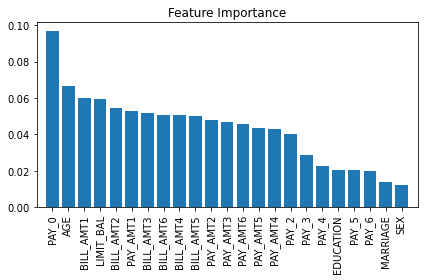

In [8]:
feature_labels = df.columns[1:-1]

forest = RandomForestClassifier(n_estimators=200)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
xlabel = []

for i in range(X_train_std.shape[1]):
    xlabel.append(feature_labels[indices[i]])
    print("%2d) %-*s %f" % (i+1, 30, feature_labels[indices[i]], importances[indices[i]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_std.shape[1]), xlabel, rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
plt.show()

# Part 3: Conclusions

a)	What is the relationship between n_estimators, in-sample CV accuracy and computation time?
   As we can see from part 1, as n_estimators increases, in-sample CV accuracy improves (until a certain level) and computation time increases. 
   However, when n_estimators is over 50, we can only a small improvements on in-sample CV accuracy, but a significant increases in computation time. When n_estimators is over 100, we even see a small decrease in in-sample-accuracy (probably due to ramdomness).

b)	What is the optimal number of estimators for your forest?  
     The optimal number of estimators for the forest is 75, acheiving an in-sample-accuracy  of 0.8156 and an out-of-sample accuracy of 0.8119. Computation time of 100 or 150 estimators is too large compared to computation time of 75 estimators, achieving similar accuracy.

c)	Which features contribute the most importance in your model according to scikit-learn function?  
As we can see from part 2, PAY_0 contributes the most importance, 9.6677%.

d)	What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-Learn.org documentation.)
Feature importance is the fraction of a feature contributes to the predictive model and it's a normalized estimate of the predictive power of a feature. The higher the value, the more important is the contribution of the matching feature to the prediction function.
In random forest model, feature importance scores, whose values are positive and sum to 1, of futures are measured by the averaged impurity decrease computed from all decision trees in the forest.

# Part 4: Appendix

Link to github repo : https://github.com/TakumiDawn/Machine-Learning-in-Finance-Lab/tree/master/IE517_F20_HW7

In [9]:
print("My name is Takumi Li")
print("My NetID is: feiyang3")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Takumi Li
My NetID is: feiyang3
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
